# INTRODUCTION

Cryptocurrencies gained widespread popularity in the late 2010s and early 2020s, ushering in an era of dynamic and ever-changing data. The vast amount of data available for analysis prompted the implementation of a semi-automated process. This process involves pulling data at specified time intervals through an API with an API Key generated from 'https://coinmarketcap.com '.

By leveraging this approach, the data is transformed into a format suitable for analysis, allowing for the creation of insightful graphs. These graphs serve as a powerful tool to derive meaningful insights from the evolving landscape of cryptocurrency markets. 


In [2]:
# importing the requried libraries in advance

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

In [3]:
# this is the Script give from the documentation in the website of coinmarketcap 
# the API key which allows the user to pull data is limited to only 10,000 runs per month
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8684eb40-9b7f-443d-9eb6-80a37871ecdd',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#it gives error stating"IOPub data rate exceeded."
#so using the documentation I had to use the command "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" on conda prompt 
#It directs to different local host note book and enables to Pull data in JSON Format

{'status': {'timestamp': '2024-02-03T00:54:01.912Z', 'error_code': 0, 'error_message': None, 'elapsed': 38, 'credit_count': 1, 'notice': None, 'total_count': 8847}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10810, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [4]:
type(data)

dict

In [5]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-02-03T00:54:01.912Z,0,None,38,1,None,8847


In [6]:
#making all the columns visible 

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


# using json functions to get a structured data 
df1=pd.json_normalize(data['data'])
df1['timestamp']=pd.to_datetime('now')
df1.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10810,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.961656e+07,1.961656e+07,False,NaN,1,NaN,NaN,None,2024-02-03T00:53:00.000Z,43253.631015,1.826106e+10,-15.1412,0.187587,0.074319,3.569054,0.890844,3.281870,23.671359,8.484873e+11,51.1748,9.083263e+11,None,2024-02-03T00:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-03 06:24:06.216229
1,1027,Ethereum,ETH,ethereum,8367,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201820e+08,1.201820e+08,True,NaN,2,NaN,NaN,None,2024-02-03T00:53:00.000Z,2314.580133,7.079706e+09,-20.9421,0.313436,0.143619,1.649779,4.655367,2.933058,25.205827,2.781710e+11,16.7773,2.781710e+11,None,2024-02-03T00:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-03 06:24:06.216229
2,825,Tether USDt,USDT,tether,74003,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.623134e+10,9.960077e+10,True,NaN,3,NaN,NaN,None,2024-02-03T00:52:00.000Z,0.999635,3.193351e+10,-15.0508,0.000046,-0.006382,-0.039091,-0.093257,-0.017159,-0.156458,9.619619e+10,5.8019,9.956439e+10,None,2024-02-03T00:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-03 06:24:06.216229
3,1839,BNB,BNB,bnb,2050,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495467e+08,1.495467e+08,False,NaN,4,NaN,NaN,None,2024-02-03T00:52:00.000Z,301.865693,6.967156e+08,-7.6906,0.248262,0.161903,-0.334043,-3.975144,29.044451,27.099439,4.514301e+10,2.7227,4.514301e+10,None,2024-02-03T00:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-03 06:24:06.216229
4,5426,Solana,SOL,solana,624,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.359729e+08,5.685449e+08,True,NaN,5,NaN,NaN,None,2024-02-03T00:53:00.000Z,100.377911,2.438701e+09,-20.5742,-0.016121,1.287399,8.609141,0.405897,61.905640,139.320781,4.376205e+10,2.6394,5.706935e+10,None,2024-02-03T00:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-03 06:24:06.216229


In [7]:
 df=pd.DataFrame()
#creating a fuction of API Pull to make it repeatable

def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
     'start':'1',
     'limit':'15',
     'convert':'USD'
     }
    headers = {
     'Accepts': 'application/json',
     'X-CMC_PRO_API_KEY': '8684eb40-9b7f-443d-9eb6-80a37871ecdd',
     }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #Since I have called the dataframe named df previously now by create df2 and appending it with df we can add the update data for every call
    
    df2=pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
   
    df=df._append(df2)
    #df=df2 (for replacing data)
    
    

In [8]:
#Code for automating the pull for every time interval
import os 
from time import time
from time import sleep
from time import ctime

#the above functions gives the ability to track the time and enables to call the API in selected intervals of time
def sleep_minutes(minutes):
    sleep(minutes*60)
max_iterations=5

for i in range(max_iterations):
    current_time=ctime(time())
    api_runner()
    print('['+current_time+'] API call was success')
    sleep_minutes(60) #call interval is 1 hour

print('done')

#the above FOR loop calls the updated data from API for every one hour untill the max_iterations are done

[Sat Feb  3 06:24:22 2024] API call was success
[Sat Feb  3 07:24:23 2024] API call was success
[Sat Feb  3 08:24:24 2024] API call was success
[Sat Feb  3 09:24:26 2024] API call was success
[Sat Feb  3 10:24:28 2024] API call was success
done


In [125]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,year_added,currency_exchanged_in_24h
0,1,Bitcoin,BTC,bitcoin,10810,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19616556.000000,19616556.000000,False,NaN,1,NaN,NaN,None,2024-02-03T00:53:00.000Z,43253.631015,18261061854.229755,-15.141200,0.187587,0.074319,3.569054,0.890844,3.281870,23.671359,848487275018.443848,51.174800,908326251325.020020,None,2024-02-03T00:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-03 06:24:23.363129,2010,422185.639113
1,1027,Ethereum,ETH,ethereum,8367,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120182048.209561,120182048.209561,True,NaN,2,NaN,NaN,None,2024-02-03T00:53:00.000Z,2314.580133,7079705699.486090,-20.942100,0.313436,0.143619,1.649779,4.655367,2.933058,25.205827,278170981163.822083,16.777300,278170981163.820007,None,2024-02-03T00:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-03 06:24:23.363129,2015,3058742.964939
2,825,Tether USDt,USDT,tether,74003,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,96231343353.013916,99600769237.824280,True,NaN,3,NaN,NaN,None,2024-02-03T00:52:00.000Z,0.999635,31933509692.412476,-15.050800,0.000046,-0.006382,-0.039091,-0.093257,-0.017159,-0.156458,96196190569.211594,5.801900,99564385621.160004,None,2024-02-03T00:52:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-03 06:24:23.363129,2015,31945179091.747570
3,1839,BNB,BNB,bnb,2050,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149546670.486159,149546670.486159,False,NaN,4,NaN,NaN,None,2024-02-03T00:52:00.000Z,301.865693,696715612.817145,-7.690600,0.248262,0.161903,-0.334043,-3.975144,29.044451,27.099439,45143009294.152885,2.722700,45143009294.150002,None,2024-02-03T00:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-03 06:24:23.363129,2017,2308031.781701
4,5426,Solana,SOL,solana,624,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,435972909.420616,568544931.031280,True,NaN,5,NaN,NaN,None,2024-02-03T00:53:00.000Z,100.377911,2438701208.026254,-20.574200,-0.016121,1.287399,8.609141,0.405897,61.905640,139.320781,43762049837.762794,2.639400,57069352405.089996,None,2024-02-03T00:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-03 06:24:23.363129,2020,24295197.889778
5,52,XRP,XRP,xrp,1225,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,54436190886.000000,99987935982.000000,False,NaN,6,NaN,NaN,None,2024-02-03T00:53:00.000Z,0.507997,917475232.661933,-7.616800,-0.402452,0.444159,-4.265709,-12.734161,-18.700013,-18.618345,27653395253.857761,1.667900,50799651488.790001,None,2024-02-03T00:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-03 06:24:23.363129,2013,1806065998.040326
6,3408,USDC,USDC,usd-coin,16553,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27006350723.955765,27006350723.955765,False,NaN,7,NaN,NaN,None,2024-02-03T00:53:00.000Z,1.000200,4518602433.501837,-16.003800,0.010106,-0.008427,-0.006431,-0.008515,0.029314,-0.005617,27011759798.348904,1.629100,27011759798.349998,None,2024-02-03T00:53:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-03 06:24:23.363129,2018,4517697588.467737
7,2010,Cardano,ADA,cardano,1054,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, resear

In [126]:
#formating the values for better readability
pd.set_option('display.float_format',lambda x:'%5f'%x)

In [127]:
df2=df

In [128]:
# the addition of the 'year_added' column can enhance the functionality and analysis capabilities of your DataFrame 
df2['year_added'] = pd.to_datetime(df2['date_added']).dt.year
df2.head(2)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,year_added,currency_exchanged_in_24h
0,1,Bitcoin,BTC,bitcoin,10810,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19616556.000000,19616556.000000,False,NaN,1,NaN,NaN,None,2024-02-03T00:53:00.000Z,43253.631015,18261061854.229755,-15.141200,0.187587,0.074319,3.569054,0.890844,3.281870,23.671359,848487275018.443848,51.174800,908326251325.020020,None,2024-02-03T00:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-03 06:24:23.363129,2010,422185.639113
1,1027,Ethereum,ETH,ethereum,8367,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120182048.209561,120182048.209561,True,NaN,2,NaN,NaN,None,2024-02-03T00:53:00.000Z,2314.580133,7079705699.486090,-20.942100,0.313436,0.143619,1.649779,4.655367,2.933058,25.205827,278170981163.822083,16.777300,278170981163.820007,None,2024-02-03T00:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-03 06:24:23.363129,2015,3058742.964939


In [129]:
#quote.USD.volume_24h=total value of trades that occured within last 24hrs
#quote.usd.market_cap=total value of crptocurrency based on its current value and supply

df2['currency_exchanged_in_24h']=df2['quote.USD.volume_24h']/df2['quote.USD.price']

In [134]:
#The main objective was to pull data in automatic manner.since,that  objective is fulfilled I am taking mean of the data that has been pulled

df3=df2.groupby('name',sort=False)[['num_market_pairs','total_supply','quote.USD.price','quote.USD.volume_24h','currency_exchanged_in_24h',
                               'quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d',
                               'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d',
                               'quote.USD.market_cap','quote.USD.market_cap_dominance','year_added']].mean()

In [135]:
df3

,num_market_pairs,total_supply,quote.USD.price,quote.USD.volume_24h,currency_exchanged_in_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,year_added
name,,,,,,,,,,,,,,
Bitcoin,10810.000000,19616614.800000,43185.943064,17925115865.665909,415065.466739,0.003744,0.255319,3.259857,0.446355,3.362636,23.055779,847162008913.005737,51.132380,2010.000000
Ethereum,8367.000000,120180692.228510,2320.208907,7071678363.143817,3047865.897032,0.118992,0.719716,2.023749,4.310783,3.867260,24.481278,278844311474.450745,16.830280,2015.000000
Tether USDt,74003.000000,99600769237.824280,0.999627,31382777400.158337,31394476541.357735,-0.000150,-0.008360,-0.034536,-0.106136,-0.020785,-0.126834,96195494956.673599,5.806120,2015.000000
BNB,2050.000000,149546663.689113,302.330210,698923010.730446,2311785.636128,0.130541,0.171910,-0.725103,-4.308921,29.990200,25.901575,45212474245.213814,2.728900,2017.000000
Solana,624.000000,568579006.570431,99.688762,2378512901.634515,23858526.353920,-0.165286,0.632212,7.483151,-0.636902,63.973881,135.634041,43464051372.802696,2.623360,2020.000000
XRP,1225.000000,99987935982.000000,0.507128,892685571.223432,1760260038.348214,-0.118876,0.268405,-4.721103,-12.707382,-18.323660,-18.652006,27606108877.491951,1.666240,2013.000000
USDC,16554.200000,27016959523.340660,1.000179,4449920469.118792,4449123807.777505,0.001410,-0.002708,-0.009488,0.007201,0.032994,-0.002405,27021795125.964794,1.630940,2018.000000
Cardano,1054.000000,36585743945.107002,0.518299,415035973.639822,800776906.032782,0.114918,2.120398,6.553341,-7.384419,27.585251,57.123644,18362019228.798149,1.108300,2017.000000
Avalanche,659.000000,435178310.856304,36.483441,751184023.066540,20592536.182145,-0.349322,6.543587,12.004905,-1.035439,60.232194,197.685918,13394727575.095013,0.808460,2020.000000


In [136]:
df4=df3.reset_index()

In [137]:
df4

,name,num_market_pairs,total_supply,quote.USD.price,quote.USD.volume_24h,currency_exchanged_in_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,year_added
0,Bitcoin,10810.000000,19616614.800000,43185.943064,17925115865.665909,415065.466739,0.003744,0.255319,3.259857,0.446355,3.362636,23.055779,847162008913.005737,51.132380,2010.000000
1,Ethereum,8367.000000,120180692.228510,2320.208907,7071678363.143817,3047865.897032,0.118992,0.719716,2.023749,4.310783,3.867260,24.481278,278844311474.450745,16.830280,2015.000000
2,Tether USDt,74003.000000,99600769237.824280,0.999627,31382777400.158337,31394476541.357735,-0.000150,-0.008360,-0.034536,-0.106136,-0.020785,-0.126834,96195494956.673599,5.806120,2015.000000
3,BNB,2050.000000,149546663.689113,302.330210,698923010.730446,2311785.636128,0.130541,0.171910,-0.725103,-4.308921,29.990200,25.901575,45212474245.213814,2.728900,2017.000000
4,Solana,624.000000,568579006.570431,99.688762,2378512901.634515,23858526.353920,-0.165286,0.632212,7.483151,-0.636902,63.973881,135.634041,43464051372.802696,2.623360,2020.000000
5,XRP,1225.000000,99987935982.000000,0.507128,892685571.223432,1760260038.348214,-0.118876,0.268405,-4.721103,-12.707382,-18.323660,-18.652006,27606108877.491951,1.666240,2013.000000
6,USDC,16554.200000,27016959523.340660,1.000179,4449920469.118792,4449123807.777505,0.001410,-0.002708,-0.009488,0.007201,0.032994,-0.002405,27021795125.964794,1.630940,2018.000000
7,Cardano,1054.000000,36585743945.107002,0.518299,415035973.639822,800776906.032782,0.114918,2.120398,6.553341,-7.384419,27.585251,57.123644,18362019228.798149,1.108300,2017.000000
8,Avalanche,659.000000,435178310.856304,36.483441,751184023.066540,20592536.182145,-0.349322,6.543587,12.004905,-1.035439,60.232194,197.685918,13394727575.095013,0.808460,2020.000000
9,Dogecoin,887.000000,142913980383.705231,0.079241,210290091.498539,2653812787.659856,0.013517,-0.460903,-0.935156,-3.640675,-12.186020,13.957261,11324648012.786617,0.683520,2013.000000


In [222]:
#currencies with highest market cap
top_10_currencies = df4[['name','quote.USD.market_cap']].sort_values(by='quote.USD.market_cap', ascending=False).head(10)
top_10_currencies

,name,quote.USD.market_cap
0,Bitcoin,847162008913.005737
1,Ethereum,278844311474.450745
2,Tether USDt,96195494956.673599
3,BNB,45212474245.213814
4,Solana,43464051372.802696
5,XRP,27606108877.491951
6,USDC,27021795125.964794
7,Cardano,18362019228.798149
8,Avalanche,13394727575.095013
9,Dogecoin,11324648012.786617


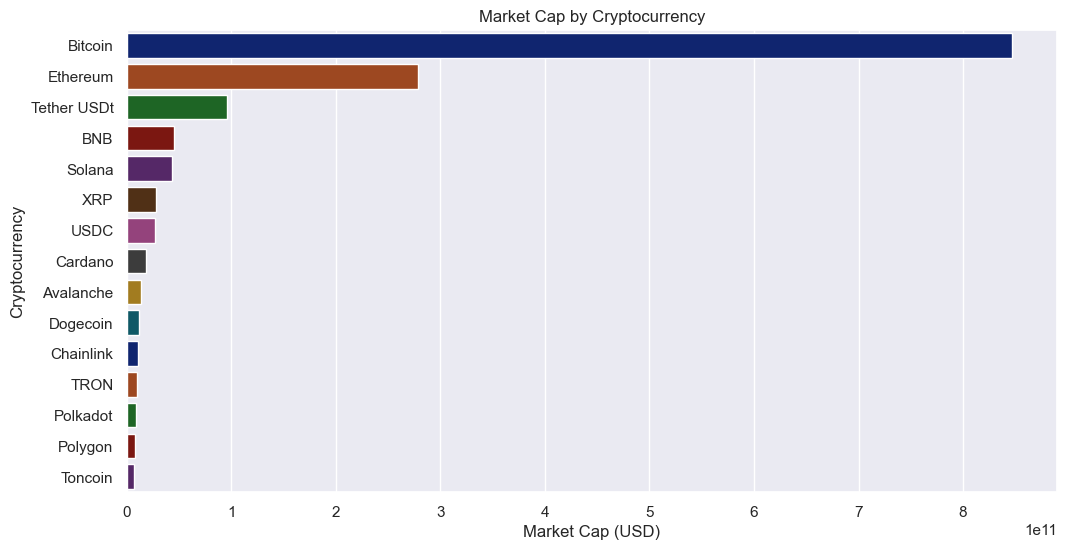

In [223]:
#Graph for market share of top 15 crypocurrencies

plt.figure(figsize=(12, 6))
sns.barplot(x='quote.USD.market_cap', y='name', data=df4, palette='dark')
plt.title('Market Cap by Cryptocurrency')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Cryptocurrency')
plt.show()

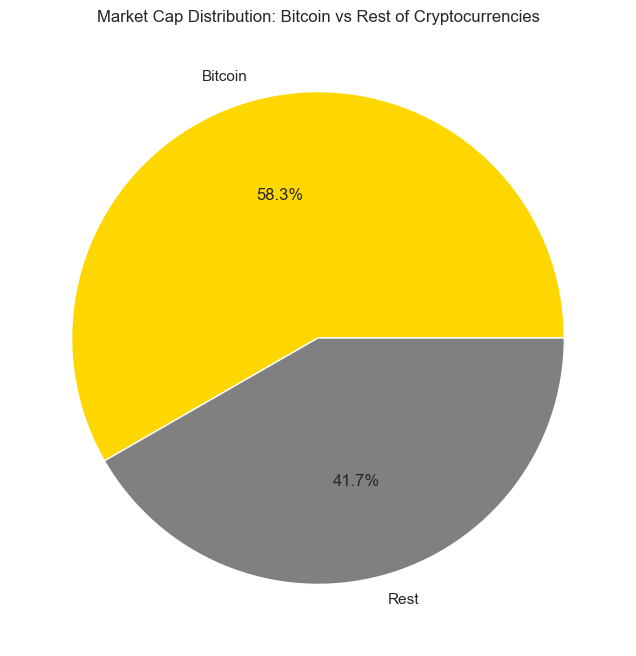

In [224]:
# graph for showing market cap of Bitcoin vs remaining combined

bitcoin_market_cap = df4[df4['name'] == 'Bitcoin']['quote.USD.market_cap'].values[0]
rest = df4[df4['name'] != 'Bitcoin']['quote.USD.market_cap'].sum()

# Data for the pie chart
labels = ['Bitcoin', 'Rest']
sizes = [bitcoin_market_cap, rest]
colors = ['gold','grey']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%')
plt.title('Market Cap Distribution: Bitcoin vs Rest of Cryptocurrencies')
plt.show()

Bitcoin dominates all other cryptocurrencies in terms Market cap and the share is more than 50% with all other currencies amount to less than 50% combined

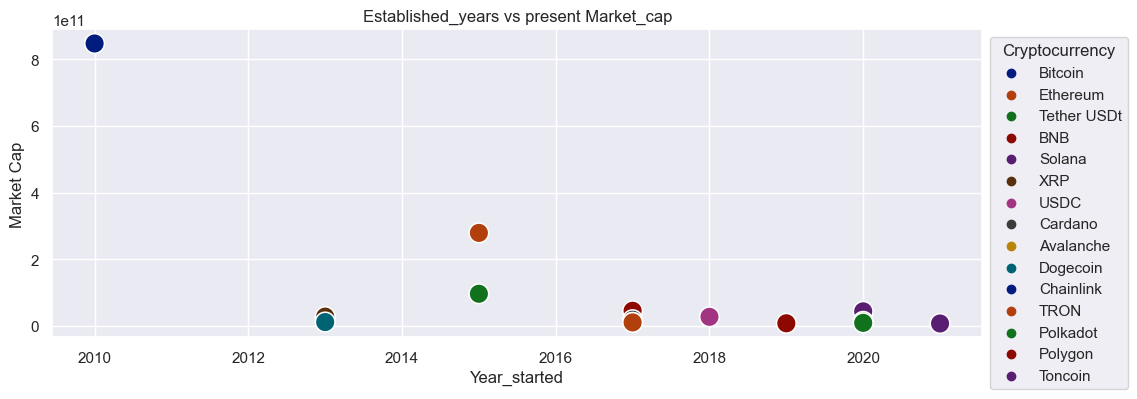

In [225]:
#extra plot

plt.figure(figsize=(12, 4))
sns.scatterplot(x='year_added', y='quote.USD.market_cap', hue='name', data=df4, palette='dark', marker='o',s=200)
plt.title('Established_years vs present Market_cap')
plt.xlabel('Year_started')
plt.ylabel('Market Cap')
plt.legend(title='Cryptocurrency', bbox_to_anchor=(1, 1))
plt.show()

Cryptocurrencies that were established earlier found greater success in terms of market Cap 

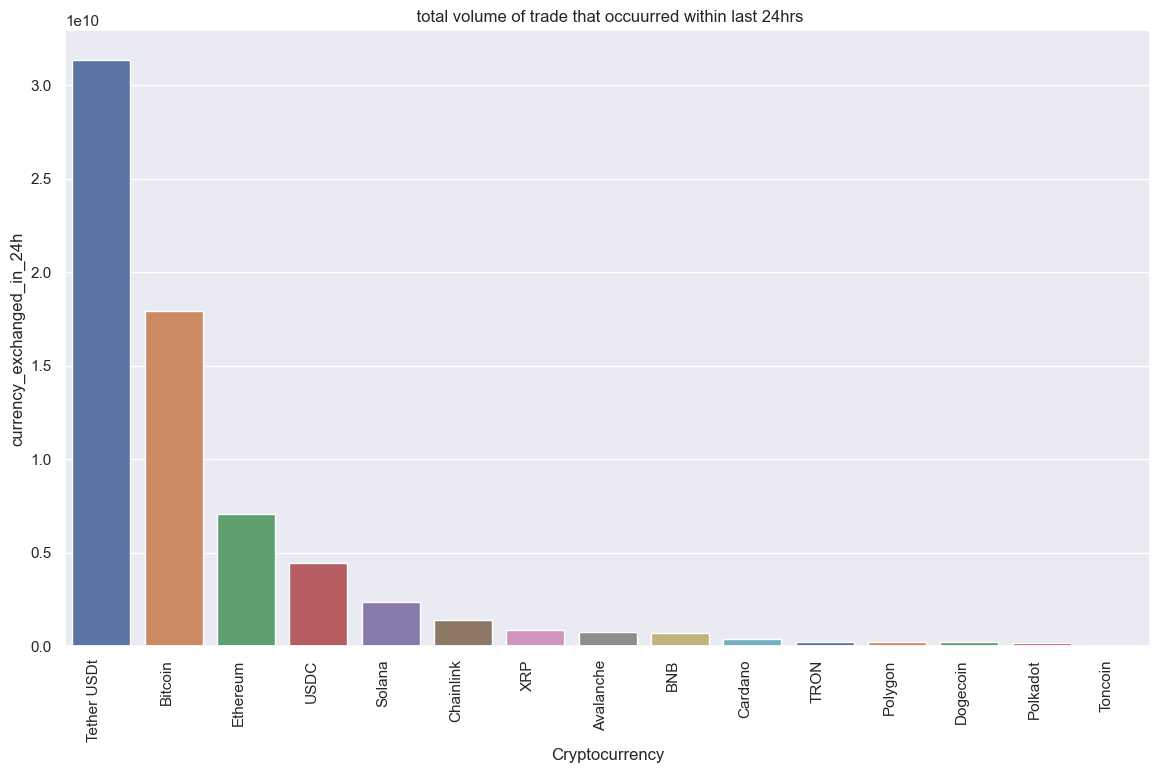

In [226]:
#barplot showing currency exchanged in last 24hrs

df4_sort=df4.sort_values(by='quote.USD.volume_24h',ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='name', y='quote.USD.volume_24h', data=df4_sort,palette='deep')
plt.title(' total volume of trade that occuurred within last 24hrs')
plt.xlabel('Cryptocurrency')
plt.ylabel('currency_exchanged_in_24h')
plt.xticks(rotation=90, ha='right')
plt.show()

### bitcoin dominated in terms of value but interms but not in terms of volume exchanged tether USDt has more currency exchanged than Bitcoin by almost 2 times

In [227]:
#rearranging the data frame by removing some useless columns

columns_to_remove = ['num_market_pairs', 'total_supply', 'quote.USD.price','quote.USD.market_cap','quote.USD.market_cap_dominance','year_added','quote.USD.volume_24h','currency_exchanged_in_24h']
df5 = df3.drop(columns=columns_to_remove)
df5

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.003744,0.255319,3.259857,0.446355,3.362636,23.055779
Ethereum,0.118992,0.719716,2.023749,4.310783,3.867260,24.481278
Tether USDt,-0.000150,-0.008360,-0.034536,-0.106136,-0.020785,-0.126834
BNB,0.130541,0.171910,-0.725103,-4.308921,29.990200,25.901575
Solana,-0.165286,0.632212,7.483151,-0.636902,63.973881,135.634041
XRP,-0.118876,0.268405,-4.721103,-12.707382,-18.323660,-18.652006
USDC,0.001410,-0.002708,-0.009488,0.007201,0.032994,-0.002405
Cardano,0.114918,2.120398,6.553341,-7.384419,27.585251,57.123644
Avalanche,-0.349322,6.543587,12.004905,-1.035439,60.232194,197.685918


In [228]:
#by using stack function to make columns to rows

df6=df5.stack()
df6.head(5)

name                                 
Bitcoin  quote.USD.percent_change_1h    0.003744
         quote.USD.percent_change_24h   0.255319
         quote.USD.percent_change_7d    3.259857
         quote.USD.percent_change_30d   0.446355
         quote.USD.percent_change_60d   3.362636
dtype: float64

In [229]:
type(df6)

pandas.core.series.Series

In [230]:
df7=df6.to_frame()
df7.head()

0
name                                         
Bitcoin quote.USD.percent_change_1h  0.003744
        quote.USD.percent_change_24h 0.255319
        quote.USD.percent_change_7d  3.259857
        quote.USD.percent_change_30d 0.446355
        quote.USD.percent_change_60d 3.362636

In [231]:
type(df7)

pandas.core.frame.DataFrame

In [232]:
df8=df7.reset_index()
df8.head()

,name,level_1,0
0,Bitcoin,quote.USD.percent_change_1h,0.003744
1,Bitcoin,quote.USD.percent_change_24h,0.255319
2,Bitcoin,quote.USD.percent_change_7d,3.259857
3,Bitcoin,quote.USD.percent_change_30d,0.446355
4,Bitcoin,quote.USD.percent_change_60d,3.362636


In [233]:
type(df8)

pandas.core.frame.DataFrame

In [234]:
df8.rename(columns={'level_1':'Time_period',0:'values'},inplace=True)
df8.head(5)

,name,Time_period,values
0,Bitcoin,quote.USD.percent_change_1h,0.003744
1,Bitcoin,quote.USD.percent_change_24h,0.255319
2,Bitcoin,quote.USD.percent_change_7d,3.259857
3,Bitcoin,quote.USD.percent_change_30d,0.446355
4,Bitcoin,quote.USD.percent_change_60d,3.362636


In [235]:
df8['Time_period']=df8['Time_period'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1H','24H','7D','30D','60D','90D'])

In [236]:
df8.head(7)

,name,Time_period,values
0,Bitcoin,1H,0.003744
1,Bitcoin,24H,0.255319
2,Bitcoin,7D,3.259857
3,Bitcoin,30D,0.446355
4,Bitcoin,60D,3.362636
5,Bitcoin,90D,23.055779
6,Ethereum,1H,0.118992


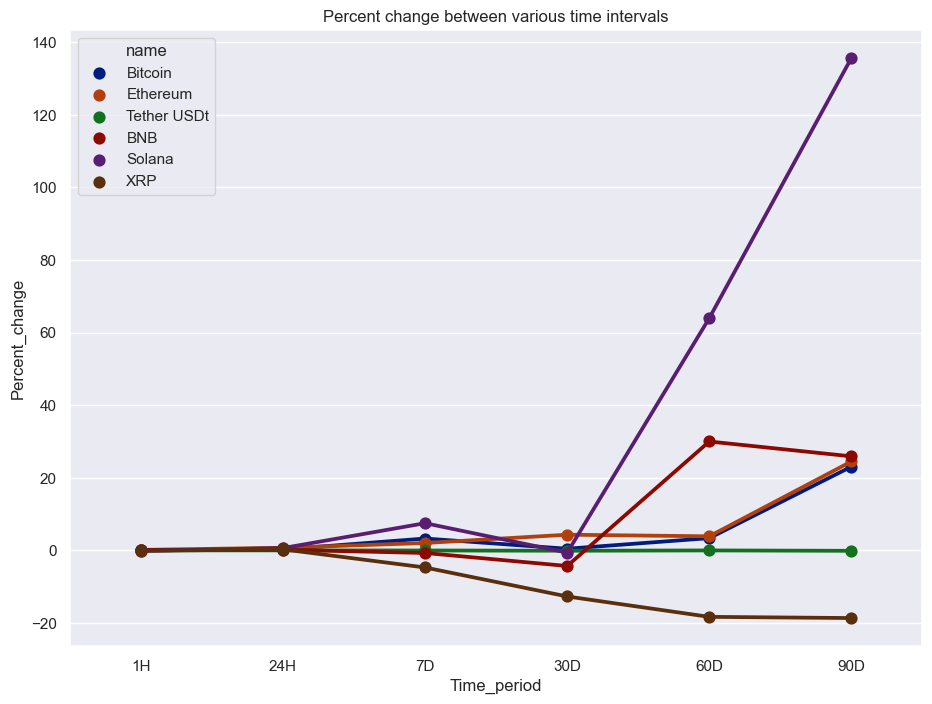

In [237]:
#plot showing Percent change for top 6 currencies between various time intervals
plt.figure(figsize=(11, 8))
sns.pointplot(data=df8.head(36),x='Time_period',y='values',hue='name',palette='dark')
plt.title('Percent change between various time intervals')
plt.xlabel('Time_period')
plt.ylabel('Percent_change')
plt.show()

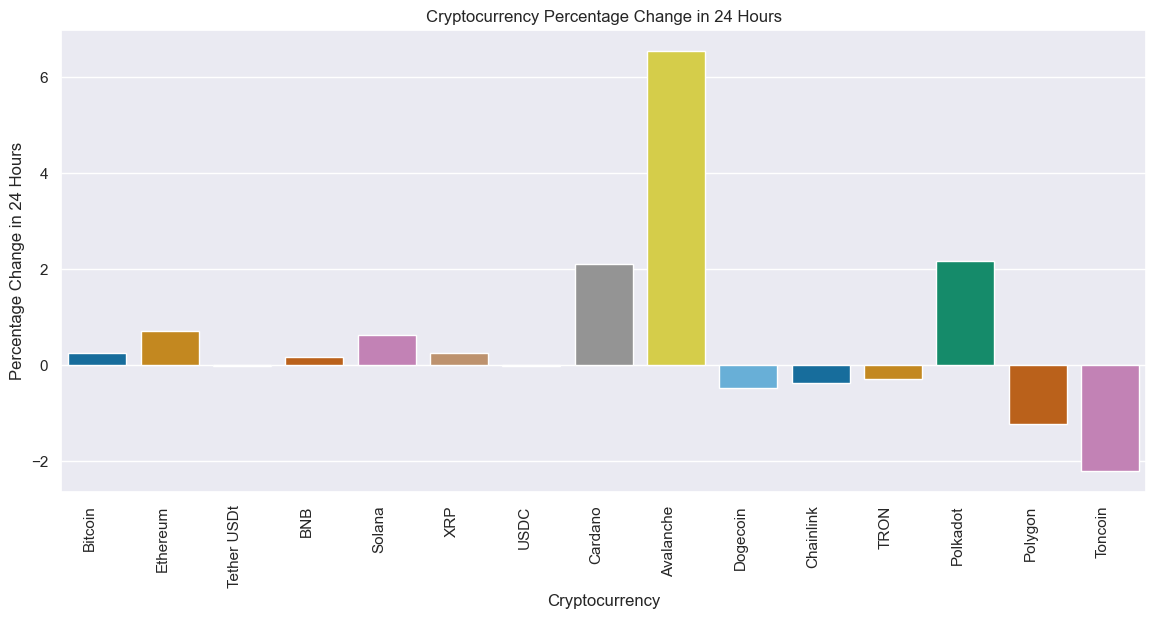

In [238]:
#since much change is not visible during 1h and 24h time for the above graph considering only change for 24h

plt.figure(figsize=(14, 6))
sns.barplot(x='name', y='quote.USD.percent_change_24h', data=df4,palette='colorblind')
plt.title('Cryptocurrency Percentage Change in 24 Hours')
plt.xlabel('Cryptocurrency')
plt.ylabel('Percentage Change in 24 Hours')
plt.xticks(rotation=90, ha='right')
plt.show()

In [239]:
#considering only bitcoin

df9=df2[['name','quote.USD.price','timestamp']]
df9=df9[df9['name']=='Bitcoin']
df9

,name,quote.USD.price,timestamp
0,Bitcoin,43253.631015,2024-02-03 06:24:23.363129
0,Bitcoin,43178.406774,2024-02-03 07:24:24.667765
0,Bitcoin,43149.210471,2024-02-03 08:24:26.018104
0,Bitcoin,43169.027160,2024-02-03 09:24:28.372461
0,Bitcoin,43179.439898,2024-02-03 10:24:30.321826


In [240]:
df9['time']=df9['timestamp'].dt.strftime('%H:%M:%S')
df9

,name,quote.USD.price,timestamp,time
0,Bitcoin,43253.631015,2024-02-03 06:24:23.363129,06:24:23
0,Bitcoin,43178.406774,2024-02-03 07:24:24.667765,07:24:24
0,Bitcoin,43149.210471,2024-02-03 08:24:26.018104,08:24:26
0,Bitcoin,43169.027160,2024-02-03 09:24:28.372461,09:24:28
0,Bitcoin,43179.439898,2024-02-03 10:24:30.321826,10:24:30


In [241]:
(df9['time']).dtype

dtype('O')

Text(0.5, 1.0, 'Value change For Bitcoin for every 1 Hour during the Call')

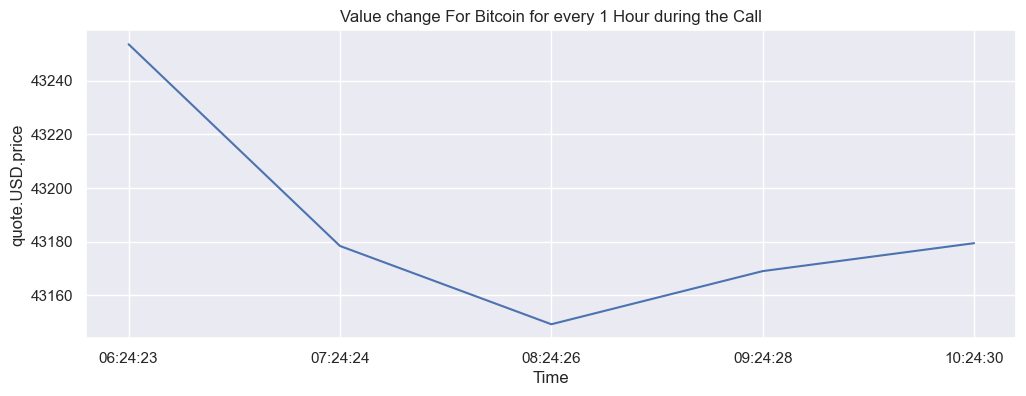

In [242]:
#Quote price variation of bitcoin in last five hours
sns.set_theme(style='darkgrid')
plt.figure(figsize=(12,4))
sns.lineplot(data=df9,x=df9['time'],y='quote.USD.price')
plt.xlabel('Time')
plt.title('Value change For Bitcoin for every 1 Hour during the Call')

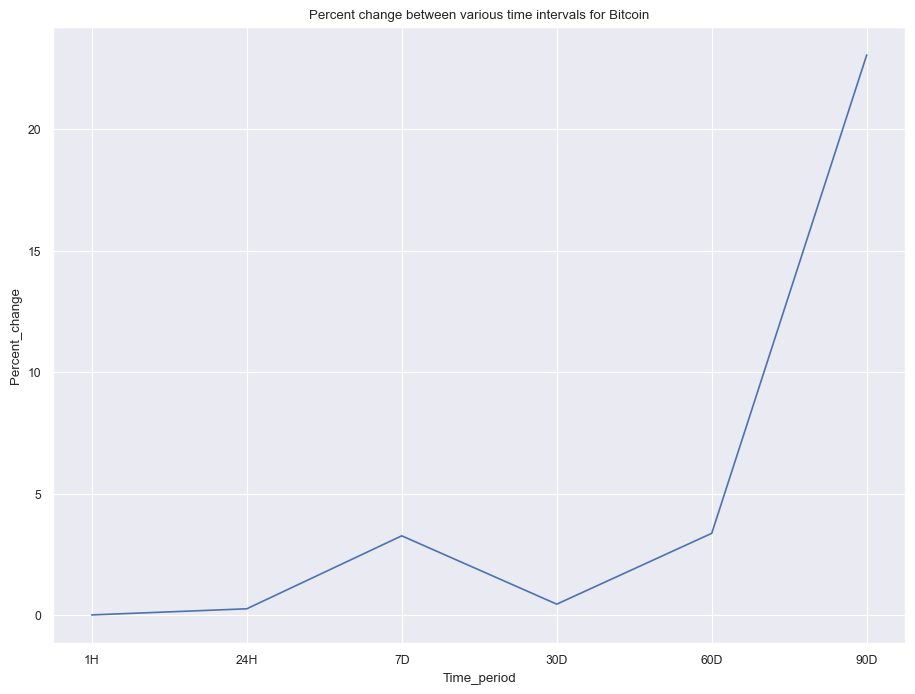

In [254]:
plt.figure(figsize=(11, 8))
sns.lineplot(data=df8.head(6),x='Time_period',y='values',palette='dark')
plt.title('Percent change between various time intervals for Bitcoin')
plt.xlabel('Time_period')
plt.ylabel('Percent_change')
plt.show()

# Conclusion: 
#### Unveiling Insights from Cryptocurrency Data

Cryptocurrencies have emerged as a significant player in the financial landscape, garnering attention from investors, traders, and enthusiasts alike. In this project, we explored into the world of cryptocurrencies, focusing on the top 15 coins by market capitalization. Through an automated data retrieval process at hourly intervals over a span of five iterations, we gathered a comprehensive dataset capturing key metrics and trends in the cryptocurrency market.

Our analysis revealed a wealth of insights into the behavior and dynamics of various cryptocurrencies.we observed the fluctuation in market capitalization values over time, providing a glimpse into the overall health and growth trajectory of each coin. By plotting the percent change in value over different time intervals (1 hour, 24 hours, 7 days, 30 days, 60 days, and 90 days), we identified patterns and trends indicative of short-term volatility and long-term performance.

Furthermore, our exploration extended to the trading volume of cryptocurrencies, shedding light on the liquidity and market activity surrounding each coin. Analyzing the volume of currency exchange within a 24-hour period offered valuable insights into investor sentiment and trading behavior.

In addition to quantitative analysis, visualizations played a crucial role in conveying our findings effectively. Graphical representations such as line plots, bar charts, and scatter plots provided a clear and intuitive understanding of complex datasets, enabling us to identify trends and anomalies.

Overall, our project underscores the importance of data-driven analysis in understanding and navigating the dynamic world of cryptocurrencies. By leveraging automated data retrieval, robust analytical techniques, and insightful visualizations, we gained valuable insights into market trends, volatility, and trading dynamics, laying the groundwork for informed decision-making in cryptocurrency investments and trading strategies.